# Exploring Dataset
## [1] importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## [2] loading the dataset and creating the dataframe

In [2]:
df_rice = pd.read_csv('../data/raw/Rice_Cammeo_Osmancik.csv')

#### showing first rows of dataframe and checking correct importation of columns (pandas did a great job).

In [3]:
# renaming columns
cols = ['Area_Integer', 'Perimeter_Real', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity_Real', 'Convex_Area_Integer', 'Extent_Real', 'Class']
df_rice.columns = cols

df_rice.head(10).round(2)

,Area_Integer,Perimeter_Real,Major_Axis_Length,Minor_Axis_Length,Eccentricity_Real,Convex_Area_Integer,Extent_Real,Class
0,15231,525.58,229.75,85.09,0.93,15617,0.57,Cammeo
1,14656,494.31,206.02,91.73,0.90,15072,0.62,Cammeo
2,14634,501.12,214.11,87.77,0.91,14954,0.69,Cammeo
3,13176,458.34,193.34,87.45,0.89,13368,0.64,Cammeo
4,14688,507.17,211.74,89.31,0.91,15262,0.65,Cammeo
5,13479,477.02,200.05,86.65,0.90,13786,0.66,Cammeo
6,15757,509.28,207.30,98.34,0.88,16150,0.59,Cammeo
7,16405,526.57,221.61,95.44,0.90,16837,0.66,Cammeo
8,14534,483.64,196.65,95.05,0.88,14932,0.65,Cammeo
9,13485,471.57,198.27,87.73,0.90,13734,0.57,Cammeo


#### showing the dataframe matrix (rows x columns) to see the real number of rows and columns of the dataframe.

In [4]:
df_rice.shape

(3810, 8)

## [3] checking variable types

#### checking if all variables types are correct.

In [5]:
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area_Integer         3810 non-null   int64  
 1   Perimeter_Real       3810 non-null   float64
 2   Major_Axis_Length    3810 non-null   float64
 3   Minor_Axis_Length    3810 non-null   float64
 4   Eccentricity_Real    3810 non-null   float64
 5   Convex_Area_Integer  3810 non-null   int64  
 6   Extent_Real          3810 non-null   float64
 7   Class                3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


#### We immediately notice that Area_Integer and Convex_Area_Integer are integers. Since in both columns descriptions talks about the **pixel count** obviously it's an integer, but for a lot of future operations (for example normalization) it's better to have all features with the _float64_ type.

In [6]:
df_rice['Area_Integer'] = df_rice['Area_Integer'].astype('float64')
df_rice['Convex_Area_Integer'] = df_rice['Convex_Area_Integer'].astype('float64')

## [4] checking imbalanced data, duplicates and missing values, constant and almost constant features

In [ ]:
# checking imbalanced data (creating dataframe with Proportion of Classes and Interpretation of the percentage)
class_balance = df_rice['Class'].value_counts(normalize=True).to_frame('Proportion')

# creating Proportion column and converting it in a percentage format (by using the lambda function we'll have a clearer output)
class_balance['Proportion'] = class_balance['Proportion'].apply(lambda x: f"{x * 100:.4f} %")

# creating Interpretation column and defining its values 
class_balance['Interpretation'] = ['Slight majority (acceptable)', 'Slight Minority (acceptable)']
print(class_balance)

         Proportion                Interpretation
Class                                            
Osmancik  57.2178 %  Slight majority (acceptable)
Cammeo    42.7822 %  Slight Minority (acceptable)


#### as we can see, since our target is 57.22 % Osmancik and 42.78 % Cammeo, it's definitely not imbalanced.

In [8]:
# looking for duplicate values
df_rice.duplicated().sum()

np.int64(0)

In [9]:
# looking for missing values
df_rice.isnull().sum()

Area_Integer           0
Perimeter_Real         0
Major_Axis_Length      0
Minor_Axis_Length      0
Eccentricity_Real      0
Convex_Area_Integer    0
Extent_Real            0
Class                  0
dtype: int64

#### We can see that there aren't either duplicates or missing values, confirming what's written on the dataset description.

In [10]:
# looking for constant features
const_cols =[]
for col in df_rice.columns:
    if df_rice[col].nunique() == 1:
        const_cols.append(col)

if const_cols != []:
    print(f"Constant columns: {const_cols}")

In [11]:
# looking for almost constant features
almost_const_cols = []
for col in df_rice.columns:
    if df_rice[col].value_counts(normalize=True).max() > 0.99:
        almost_const_cols.append(col)

if almost_const_cols!= []:
    print(f"Almost constant columns: {almost_const_cols}")

#### Since we don't have any constant or almost constant features, it's really improbable to have near-zero variance features. There are a few cases wheere a feature has different values but with an infinitesimal variance, but it's almost impossible to find in real data.

## [5] printing descriptive statistics

In [12]:
df_rice.describe()

,Area_Integer,Perimeter_Real,Major_Axis_Length,Minor_Axis_Length,Eccentricity_Real,Convex_Area_Integer,Extent_Real
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


##### Features exhibit heterogeneous distributions with varying means and standard deviations (Area_Integer spans 7.5k–18.9k, while Extent_Real ranges 0.5–0.86). This suggests feature scaling (standardization) may be beneficial for modeling. High standard deviation in Major_Axis_Length (17.45) compared to Minor_Axis_Length (5.73) indicates greater variability in grain length than width, and that's perfectly reasonable.

## [6] features value ditributions and correlations overview

Text(0.5, 1.02, 'Value Distributions and Feature Correlations')

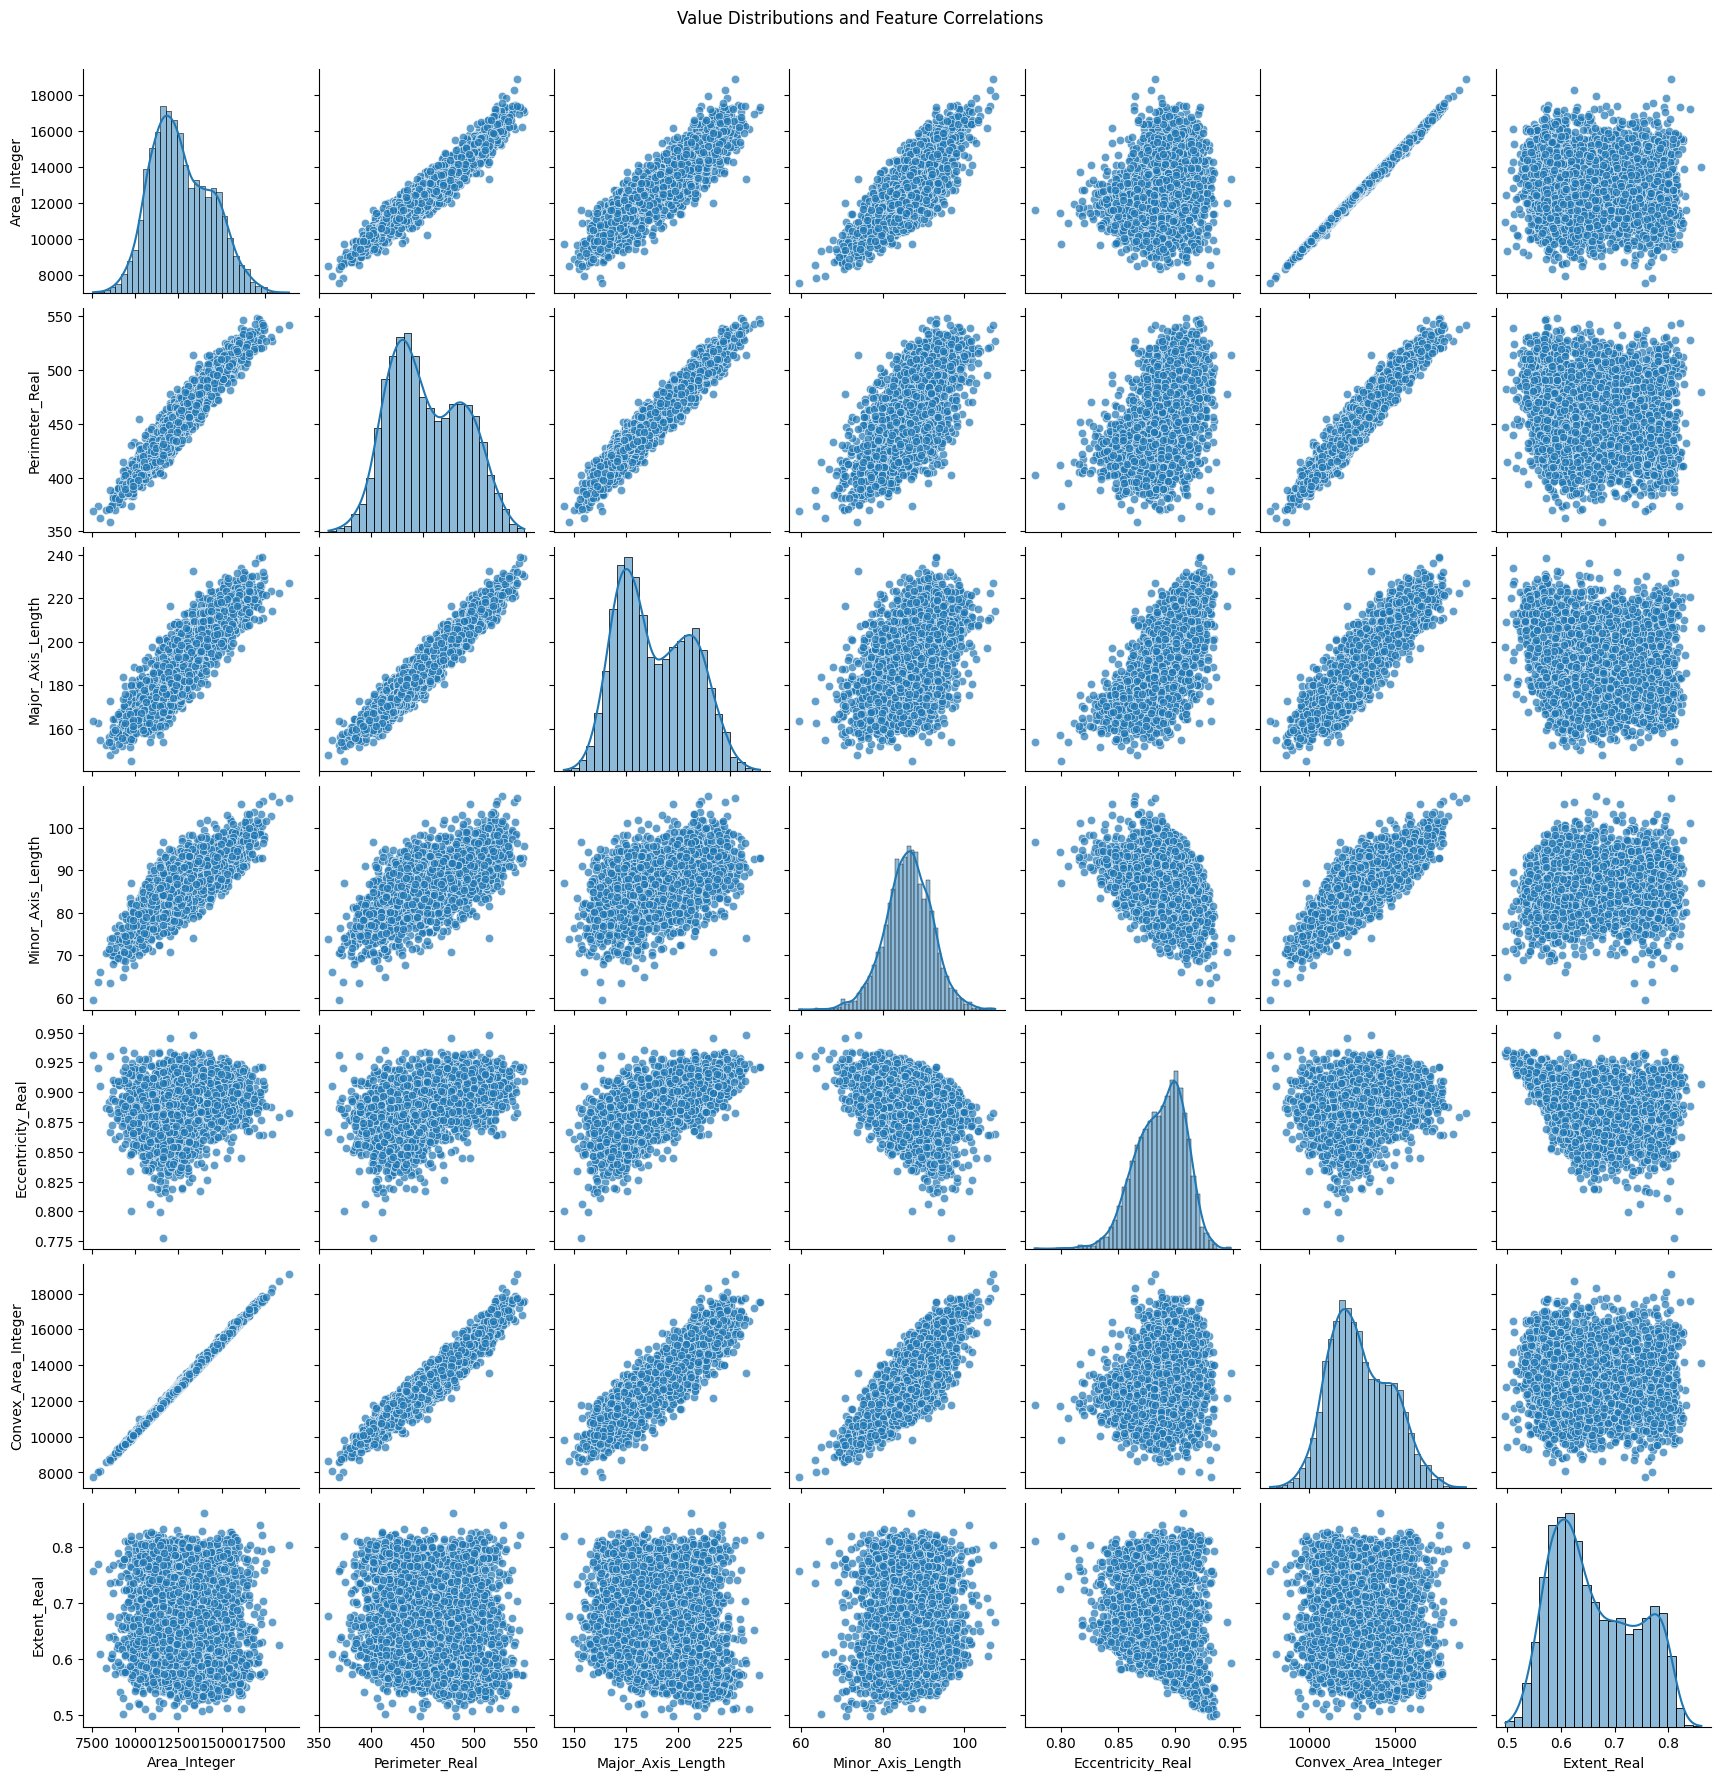

In [13]:
sns.pairplot(data=df_rice, diag_kind='hist', diag_kws={"kde": True}, plot_kws={"alpha": 0.7})
plt.suptitle("Value Distributions and Feature Correlations", y=1.02)

#### we highly suspect that Minor_Axis_Length and Eccentricity might have outliers. We cannot fail to notice the absurd correlation between Area_Integer and Convex_Area_Integer, we should also check other possible high correlations.

In [14]:
# showing the correlation matrix
corr_matrix = df_rice.corr(numeric_only=True)
corr_matrix

,Area_Integer,Perimeter_Real,Major_Axis_Length,Minor_Axis_Length,Eccentricity_Real,Convex_Area_Integer,Extent_Real
Area_Integer,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter_Real,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity_Real,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area_Integer,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent_Real,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


##### By looking at the correlation matrix we can see a few high correlations between the features. This definitely isn't what we wanted! Having values greater than 0.90 means that we surely have multicollinearity. We should check the variance inflation factor.

In [15]:
# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_results = pd.DataFrame()
vif_results["Variable"] = df_rice.select_dtypes(include='number').columns

vif_values = []
for col in df_rice.select_dtypes(include='number').columns:
    vif = variance_inflation_factor(df_rice.select_dtypes(include='number').values, 
                                  list(df_rice.select_dtypes(include='number').columns).index(col))
    vif_values.append(vif)
    
vif_results["VIF"] = vif_values
print("\nValori VIF:")
vif_results.sort_values("VIF", ascending=False)


Valori VIF:


,Variable,VIF
0,Area_Integer,58312.657592
5,Convex_Area_Integer,56306.041151
2,Major_Axis_Length,42264.657026
1,Perimeter_Real,37536.317418
4,Eccentricity_Real,12226.340862
3,Minor_Axis_Length,9837.102957
6,Extent_Real,84.759413


## [7] looking for outliers

In [16]:
# we use select_dtypes to select only numeric columns
for col in df_rice.select_dtypes(include='number').columns:
    Q1 = df_rice[col].quantile(0.25)
    Q3 = df_rice[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_rice[(df_rice[col] < lower_bound) | (df_rice[col] > upper_bound)]

    if len(outliers) > 0:
        print(f"\nFeature: {col}")
        print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
        print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
        print(f"Outliers count = {len(outliers)}")


Feature: Area_Integer
Q1 = 11370.50, Q3 = 13950.00, IQR = 2579.50
Lower Bound = 7501.25, Upper Bound = 17819.25
Outliers count = 4

Feature: Minor_Axis_Length
Q1 = 82.73, Q3 = 90.14, IQR = 7.41
Lower Bound = 71.61, Upper Bound = 101.26
Outliers count = 65

Feature: Eccentricity_Real
Q1 = 0.87, Q3 = 0.90, IQR = 0.03
Lower Bound = 0.83, Upper Bound = 0.95
Outliers count = 21

Feature: Convex_Area_Integer
Q1 = 11626.25, Q3 = 14284.00, IQR = 2657.75
Lower Bound = 7639.62, Upper Bound = 18270.62
Outliers count = 3


## --- Removing Columns Hypothesis ---

##### As we noticed before, Area_Integer and Convex_Area_Integer have a crazy linear correlation, so we need to remove the one that adds fewer informations. The Area_Integer column measures the 'pixel area' of the grain boundary, the Convex_Area_Integer column instead measures the 'pixel area' of the convex hull (it's generically less useful). Knowing these informations, we decided to remove the Convex_Area_Integer column.<br>The Perimeter_Real column doesn't add any new information when you have Major_Axis_Length, Minor_Axis_Length, Area_Integer columns.<br>In a regression model, both this columns would introduce **multicollinearity** () destabilizing the coefficient estimates.
